Populating the interactive namespace from numpy and matplotlib
\begin{tabular}{rrrrrrrrrr}
\hline
  0.579 &  0.316 &  0.526 &  0.632 &  0.789 & 1.000 & 0.053 &  0.684 &  0.421 &  0.895 \\
  0.842 &  0.737 &  0.000 &  0.474 &  0.368 & 0.158 & 0.263 &  0.211 &  0.947 &  0.105 \\
 -0.302 &  0.764 & -0.101 & -0.706 & -0.926 & 0.130 & 0.296 & -0.845 &  0.452 & -0.704 \\
 -0.683 & -0.814 &  0.000 &  0.100 &  0.687 & 0.836 & 0.948 &  0.932 & -0.338 &  0.503 \\
\hline
\end{tabular}


Text(0.5, 0, 'x')

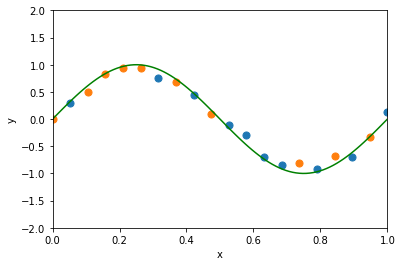

In [ ]:
%pylab inline
import matplotlib.pyplot as plt
import numpy as np
from tabulate import tabulate
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from google.colab import files
from sklearn.model_selection import train_test_split

try:
    from sklearn.preprocessing import PolynomialFeatures
    from sklearn.pipeline import make_pipeline
except ImportError:
    # use backports for sklearn 1.4
    from sklearn_backports import PolynomialFeatures
    from sklearn_backports import make_pipeline

# ignore DeprecateWarnings by sklearn
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

np.random.seed(9)

def f(x):
    return np.sin(2 * np.pi * x)

# generate points used to plot
x_plot = np.linspace(0, 1, 100)

# generate points and keep a subset of them
n_samples = 20
X = np.linspace(0, 1, n_samples)[:, np.newaxis]
y = f(X) + np.random.normal(0,0.1,size=(n_samples))[:, np.newaxis]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

Alldata = [X_train, X_test, y_train, y_test]
print(tabulate(Alldata, tablefmt="latex", floatfmt=".3f"))
#np.savetxt("mydata.csv",Alldata)
ax = plt.gca()
ax.plot(x_plot, f(x_plot), color='green')
ax.scatter(X_train, y_train, s=50)
ax.scatter(X_test, y_test, s=50)
ax.set_ylim((-2, 2))
ax.set_xlim((0, 1))
ax.set_ylabel('y')
ax.set_xlabel('x')
# plt.savefig("G1.png",dpi=600)
# files.download("G1.png")

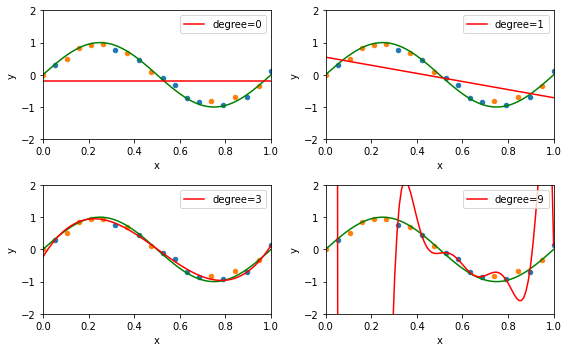

In [ ]:
def plot_approximation(est, ax, label=None):
    ax.plot(x_plot, f(x_plot), color='green')
    ax.scatter(X_train, y_train, s=20)
    ax.scatter(X_test, y_test, s=20)
    ax.plot(x_plot, est.predict(x_plot[:, np.newaxis]), color='red', label=label)
    ax.set_ylim((-2, 2))
    ax.set_xlim((0, 1))
    ax.set_ylabel('y')
    ax.set_xlabel('x')
    ax.legend(loc='upper right')  #, fontsize='small')

fig, axes = plt.subplots(2, 2, figsize=(8, 5))
# fit different polynomials and plot approximations
for ax, degree in zip(axes.ravel(), [0, 1, 3, 9]):
    est = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    est.fit(X_train, y_train)
    plot_approximation(est, ax, label='degree=%d' % degree)
    
plt.tight_layout()
# plt.savefig("G2.png",dpi=600)
# files.download("G2.png")

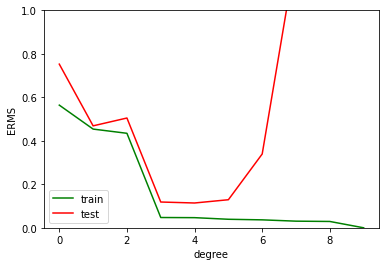

In [ ]:
from sklearn.metrics import mean_squared_error

train_error = np.empty(10)
test_error = np.empty(10)
for degree in range(10):
    est = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    est.fit(X_train, y_train)
    train_error[degree] = mean_squared_error(y_train, est.predict(X_train))
    test_error[degree] = mean_squared_error(y_test, est.predict(X_test))

plt.plot(np.arange(10), np.sqrt(train_error), color='green', label='train')
plt.plot(np.arange(10), np.sqrt(test_error), color='red', label='test')
plt.ylim((0.0, 1e0))
plt.ylabel('ERMS')
plt.xlabel('degree')
plt.legend(loc='lower left')
# plt.savefig("G3.png",dpi=600)
# files.download("G3.png")

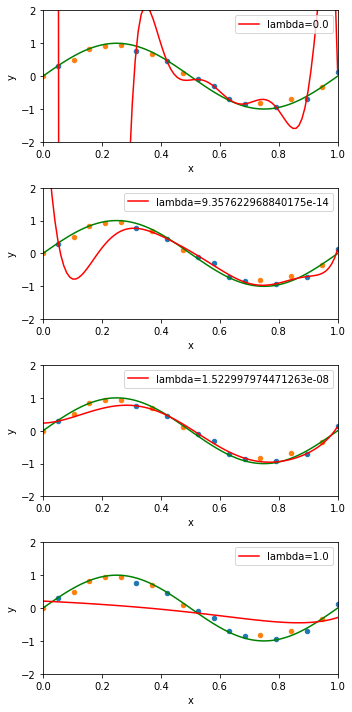

In [ ]:
fig, ax_rows = plt.subplots(4, figsize=(5, 10))

degree = 9
alphas = [np.exp(-inf), np.exp(-30), np.exp(-18), np.exp(0)]
for alpha, ax_row in zip(alphas, ax_rows):
    #ax_left, ax_right = ax_row
    est = make_pipeline(PolynomialFeatures(degree), Ridge(alpha=alpha))
    est.fit(X_train, y_train)
    plot_approximation(est, ax_row, label='lambda=%r' % alpha)
    #plot_coefficients(est, ax_right, label='Ridge(alpha=%r) coefficients' % alpha)
ax.scatter(X_test, y_test, s=50)
plt.tight_layout()
# plt.savefig("G4.png",dpi=600)
# files.download("G4.png")

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=5.39164e-17): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.87074e-17): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=8.26652e-18): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=3.88512e-18): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.42926e-18): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:148: LinAl

[-13]
[0.07692308]
0.14457792719262502
[2.26032941e-06]


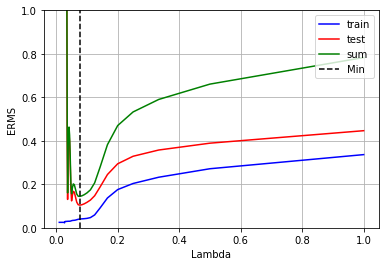

In [ ]:
n = 100+1
train_error = np.empty(n)
test_error = np.empty(n)
for alpha in range(n):
    est = make_pipeline(PolynomialFeatures(9), Ridge(alpha=(np.exp(-alpha))))
    est.fit(X_train, y_train)
    train_error[alpha] = mean_squared_error(y_train, est.predict(X_train))
    test_error[alpha] = mean_squared_error(y_test, est.predict(X_test))

SSe = (np.sqrt(train_error)+np.sqrt(test_error))
SSe2 = 1/SSe
MinVal = np.sort(SSe)
LambdaOp = numpy.where(SSe == MinVal[0])[0]

plt.plot(1/np.arange(n), np.sqrt(train_error), color='b', label='train')
plt.plot(1/np.arange(n), np.sqrt(test_error), color='r', label='test')
plt.plot(1/np.arange(n), (SSe), color='g', label='sum')
plt.plot((np.repeat(1/LambdaOp,n)), linspace(0,20,n),'--', color='k', label='Min')
# plt.plot(1/np.arange(n), np.repeat(np.sum(np.sqrt(train_error)),n), color='green', label='train')
# plt.plot(1/np.arange(n), np.repeat(np.sum(np.sqrt(test_error)),n), color='red', label='test')
plt.ylim((0.0, 1))
#plt.xlim((0, 0.2))
plt.ylabel('ERMS')
plt.xlabel('Lambda')
plt.grid(.01)
plt.legend(loc='upper right')
# plt.savefig("G5.png",dpi=600)
# files.download("G5.png")
print(-LambdaOp)
print(1/LambdaOp)
print(MinVal[0])
print(np.exp(-LambdaOp))



Text(0.5, 0, 'x')

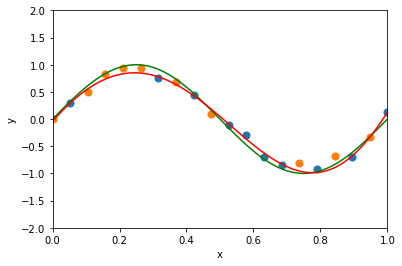

In [ ]:
#fig, ax_rows = plt.subplots(4, figsize=(5, 10))

degree = 9

est = make_pipeline(PolynomialFeatures(degree), Ridge(alpha=np.exp(-LambdaOp)))
est.fit(X_train, y_train)

ax = plt.gca()
ax.plot(x_plot, f(x_plot), color='green')
ax.plot(x_plot, est.predict(x_plot[:, np.newaxis]), color='red')
ax.scatter(X_train, y_train, s=50)
ax.scatter(X_test, y_test, s=50)
ax.set_ylim((-2, 2))
ax.set_xlim((0, 1))
ax.set_ylabel('y')
ax.set_xlabel('x')
# plt.savefig("G6.png",dpi=600)
# files.download("G6.png")